In [118]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import math, gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.optimized_ssa_solver import NumPySSASolver

Using matplotlib backend: Qt5Agg


In [132]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=1e6)
        H_ = gillespy2.Species(name='H_', initial_value=0)
        E_ = gillespy2.Species(name='E_', initial_value=2e9)
        Be_ = gillespy2.Species(name='Be_', initial_value=0)
        N_ = gillespy2.Species(name='N_', initial_value=0)
        Ta_ = gillespy2.Species(name='Ta_', initial_value=0)
        
        self.add_species([S_,H_,E_,Be_,N_,Ta_])
        
        # parameters
        ns = gillespy2.Parameter(name='ns', expression=3.38) # avg = 3.38
        nb = gillespy2.Parameter(name='nb', expression=5)
        
        k1 = gillespy2.Parameter(name='k1', expression=1e-5)
        k2 = gillespy2.Parameter(name='k2', expression=1e-10)
        k3 = gillespy2.Parameter(name='k3', expression=0.05)
        k4 = gillespy2.Parameter(name='k4', expression=2)
        k5 = gillespy2.Parameter(name='k5', expression=0.8)
        k6 = gillespy2.Parameter(name='k6', expression=5e-10)
        k8 = gillespy2.Parameter(name='k8', expression=6e-10)
        k9 = gillespy2.Parameter(name='k9', expression=5e-10)
        k10 = gillespy2.Parameter(name='k10', expression=1e-5)
        
        Sa = gillespy2.Parameter(name='Sa_', expression=3e8)
        Se = gillespy2.Parameter(name='Se_', expression=1e8)
        
        MuA = gillespy2.Parameter(name='MuA', expression=0.05)
        MuE = gillespy2.Parameter(name='MuE', expression=0.05)
        MuN = gillespy2.Parameter(name='MuN', expression=0.06)
        MuTA = gillespy2.Parameter(name='MuTA', expression=2)
        
        N0 = gillespy2.Parameter(name='N0', expression=5500)
        
        BeMAX = gillespy2.Parameter(name='BeMAX', expression=5e11)
        
        CT1 = gillespy2.Parameter(name='CT1', expression=1)
        CT2 = gillespy2.Parameter(name='CT2', expression=1)
        CT3 = gillespy2.Parameter(name='CT3', expression=1)
        CTB = gillespy2.Parameter(name='CTB', expression=1000)
        
        
        #self.add_parameter([ns,k2,k3,Sa,MuA])
        self.add_parameter([ns,nb,k1,k2,k3,k4,k5,k6,k8,k9,k10,Sa,Se,MuA,MuE,MuN,MuTA,N0,BeMAX,CT1,CT2,CT3,CTB])
        
        # reactions
        phagocytosis = gillespy2.Reaction(name='phagocytosis', reactants={S_:float(ns.expression)}, products={H_:1},
                               propensity_function="(k2*S_*(Sa_/(k2*S_ + MuA)))/ns")
        
        to_tmln = gillespy2.Reaction(name='to_tmln', reactants={H_:1}, products = {}, rate=k3)
        
        lymphocyte = gillespy2.Reaction(name='lymphocyte', reactants={}, products={}, rate)
        
        
                
        self.add_reaction([phagocytosis,to_tmln])
        t = numpy.linspace(0,10,11)
        self.timespan(t)
        # print(t)

In [133]:
model = DayModel()

In [134]:
%time results = model.run(solver=BasicTauHybridSolver())

Wall time: 1.03 s


4485.219999986447
0.004485219999986447


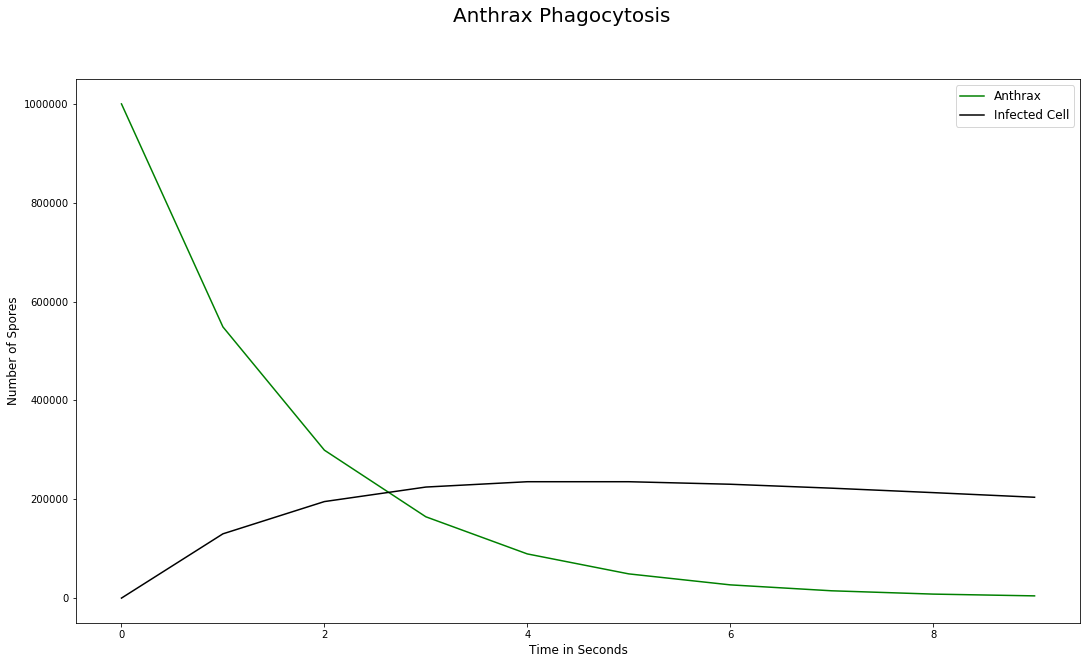

In [135]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Anthrax Phagocytosis", fontsize=20)
plt.plot(results['time'], results['S_'], 'g-', label='Anthrax')
#plt.plot(results['time'], results['M_'], 'b-', label='Macrophage')
plt.plot(results['time'], results['H_'], 'k-', label='Infected Cell')
plt.xlabel("Time in Seconds", fontsize=12)
plt.ylabel("Number of Spores", fontsize=12)
plt.legend(loc='best', fontsize=12)
#print(results['S_'][-1]/(results['S_'][0]/int(model.listOfParameters['ns'].expression)))
#print(results['H_'][-1])
print(results['S_'][-1])
print(results['S_'][-1]/results['S_'][0])


